<a href="https://colab.research.google.com/github/vmelissaa/Titanic-Survival/blob/main/Titatnic_survival.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# inline code ko in one line mai karta hai 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"McCarthy, Mr. Timothy J",male,NaN,NaN,NaN,1601,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [ ]:
pd.isnull(train).sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

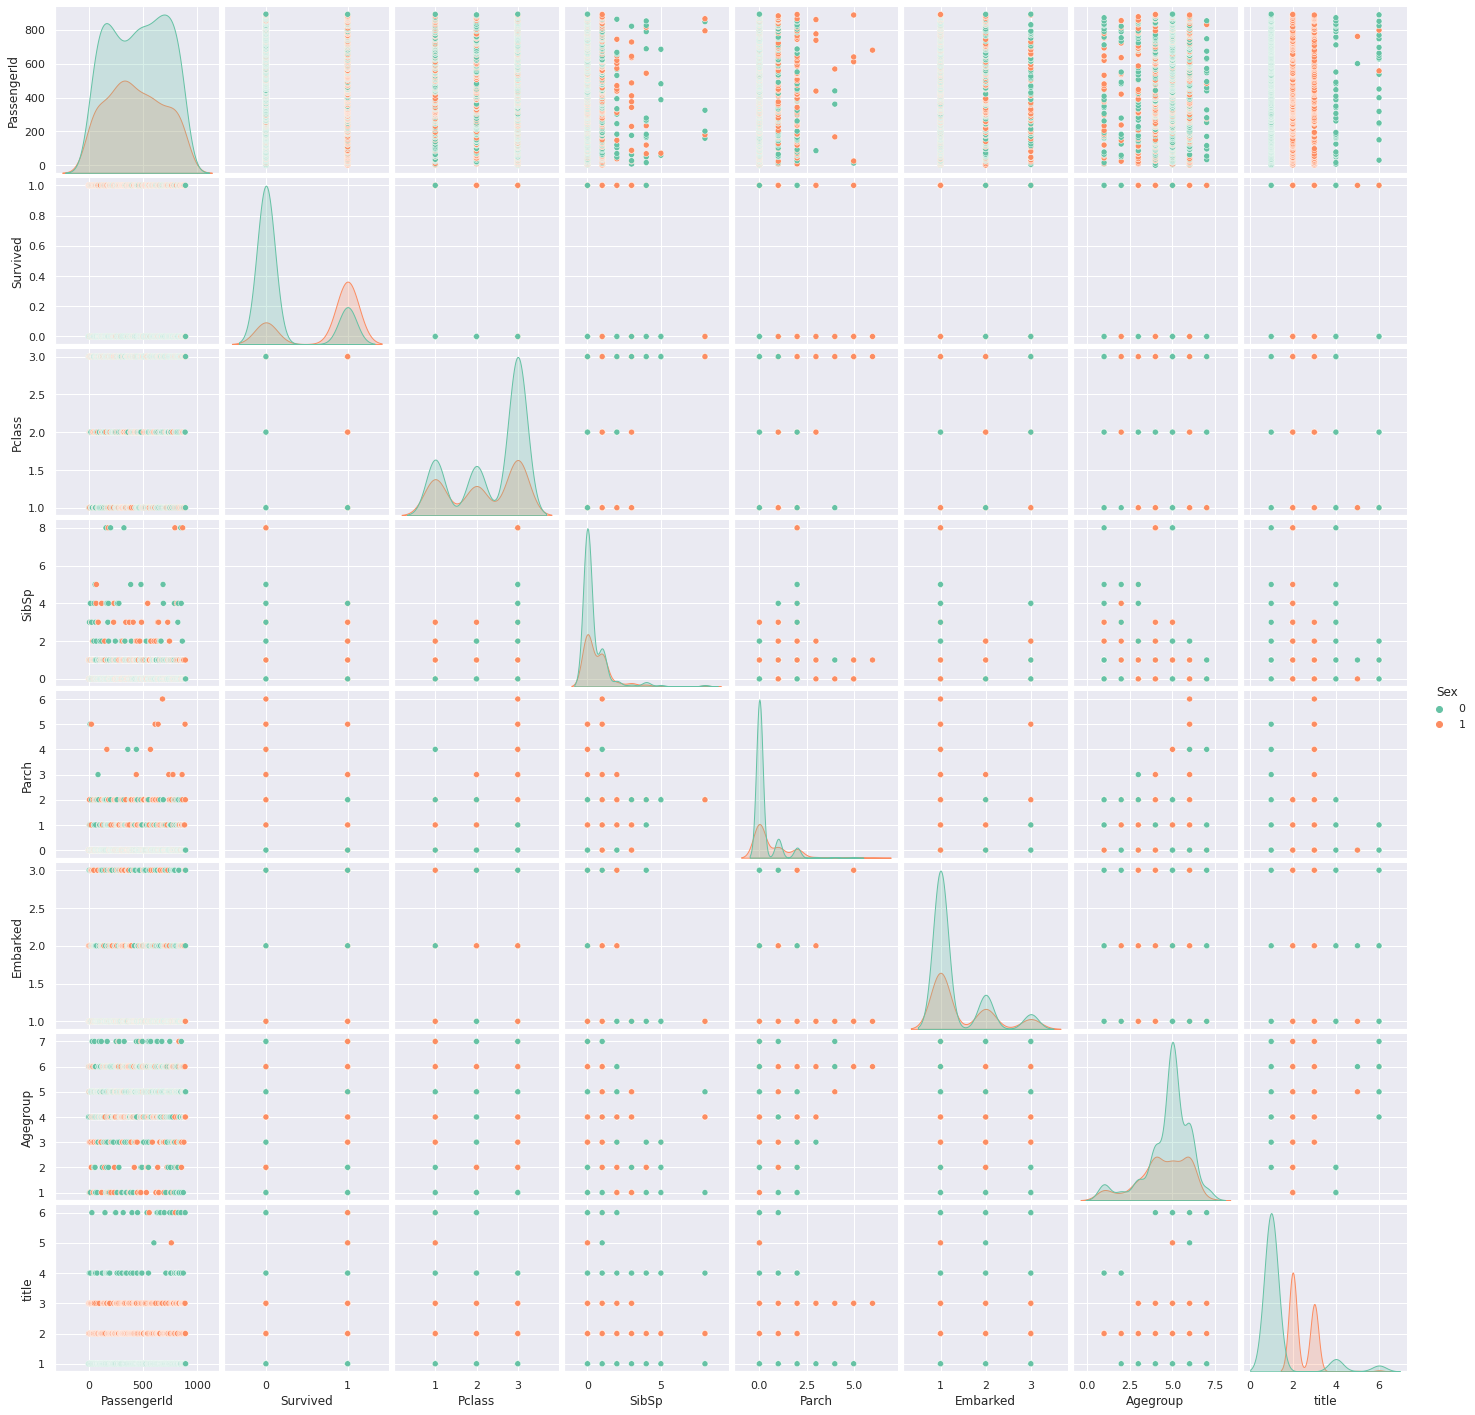

In [ ]:
sns.pairplot(train, hue="Sex", palette="Set2")

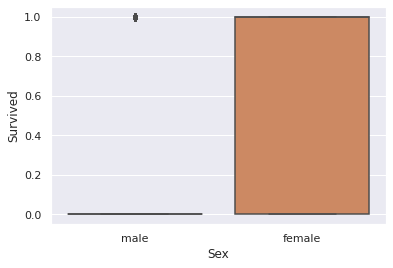

In [ ]:
sns.boxplot(data=train,x='Sex',y='Survived')


In [ ]:
print("percentage of male survived :",train['Survived'][train['Sex']=='male'].value_counts(normalize=True)[1]*100)

percentage of male survived : 18.890814558058924


In [ ]:
print("percentage of female survived :",train['Survived'][train['Sex']=='female'].value_counts(normalize=True)[1]*100)

percentage of female survived : 74.20382165605095


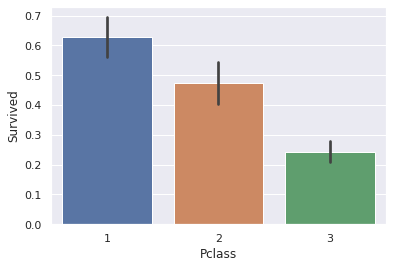

In [ ]:
sns.barplot(x='Pclass', y='Survived' , data=train ) 

In [ ]:
print("percentage of p class 1 survived :",train['Survived'][train['Pclass']==1].value_counts(normalize=True)[1]*100)

percentage of p class 1 survived : 62.96296296296296


In [ ]:
print("percentage of p class 2 survived :",train['Survived'][train['Pclass']==2].value_counts(normalize=True)[1]*100)

percentage of p class 2 survived : 47.28260869565217


In [ ]:
print("percentage of p class 3 survived :",train['Survived'][train['Pclass']==3].value_counts(normalize=True)[1]*100)

percentage of p class 3 survived : 24.236252545824847


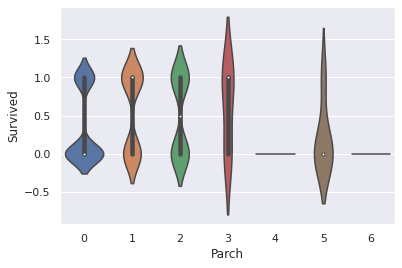

In [ ]:
sns.violinplot(data=train, x="Parch", y="Survived", 
               split=True)

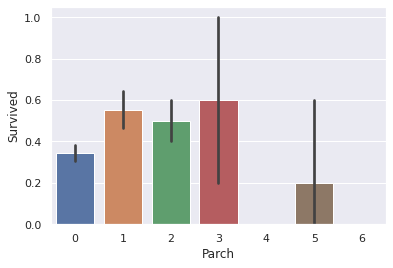

In [ ]:
sns.barplot(x="Parch", y="Survived", data=train)
plt.show()

In [ ]:
train['Age']=train['Age'].fillna(-0.5)
test['Age']=test['Age'].fillna(-0.5)
ran=[-1,0,5,12,18,24,35,60,np.inf]
label=['unknown','baby','child','teanager','student','yadult','adult','senior']
train['Agegroup']=pd.cut(train['Age'],ran,labels=label)
test['Agegroup']=pd.cut(test['Age'],ran,labels=label)

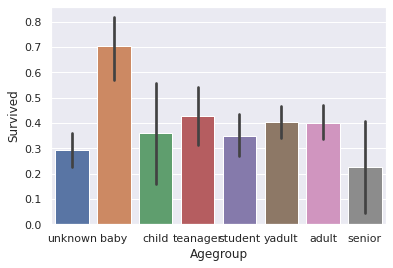

In [ ]:
sns.barplot(x='Agegroup',y='Survived',data=train)

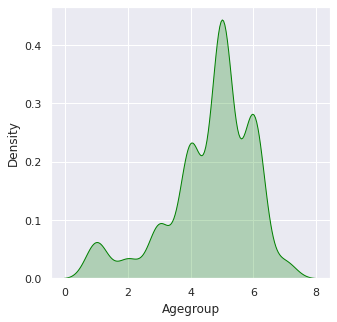

In [ ]:
plt.figure(figsize=(5,5))
sns.kdeplot(data=train,x='Agegroup',shade=True, color="green")

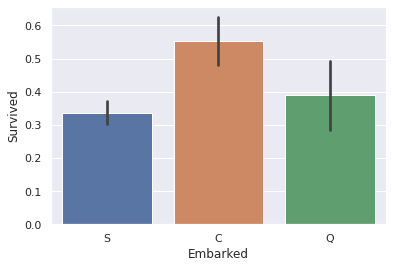

In [ ]:
sns.barplot(x='Embarked',y='Survived',data=train)

In [ ]:
# axia is 1 becz cabin is coulum , for row axis is 0
train=train.drop(['Cabin','Ticket'],axis=1)

test=test.drop(['Cabin','Ticket'],axis=1)

In [ ]:
a=train[train['Embarked']=='S'].shape[0]
b=train[train['Embarked']=='C'].shape[0]
c=train[train['Embarked']=='Q'].shape[0]
print(a,b,c)

644 168 77


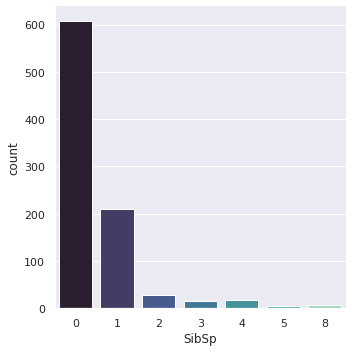

In [ ]:
sns.catplot(x="SibSp", kind="count", data=train, palette= "mako")

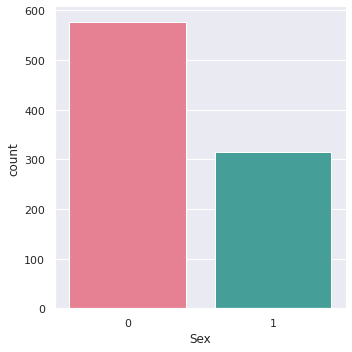

In [ ]:
sns.catplot(x= "Sex", kind= "count", data=train, palette= "husl")

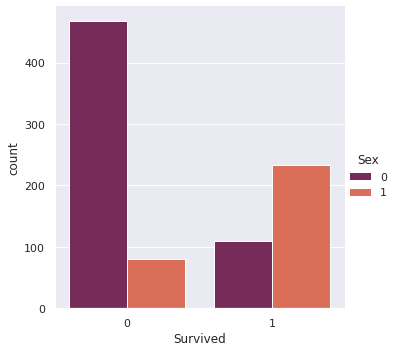

In [ ]:
sns.catplot(x="Survived", kind="count",hue="Sex",data=train, palette="rocket")

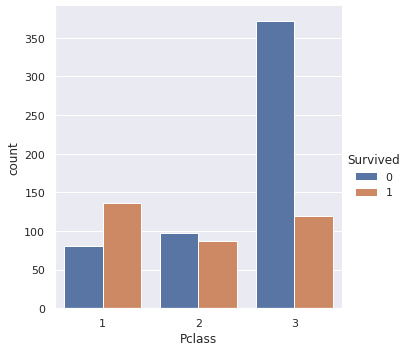

In [ ]:
sns.catplot(x="Pclass", kind= "count", hue="Survived", data=train)

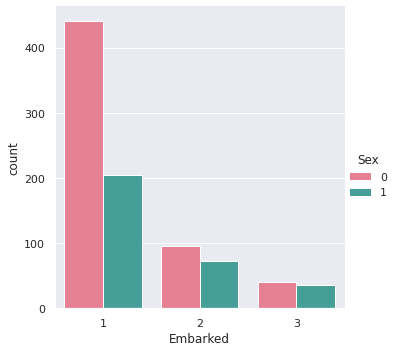

In [ ]:
sns.catplot(x="Embarked", kind="count", hue="Sex", data=train, palette="husl")

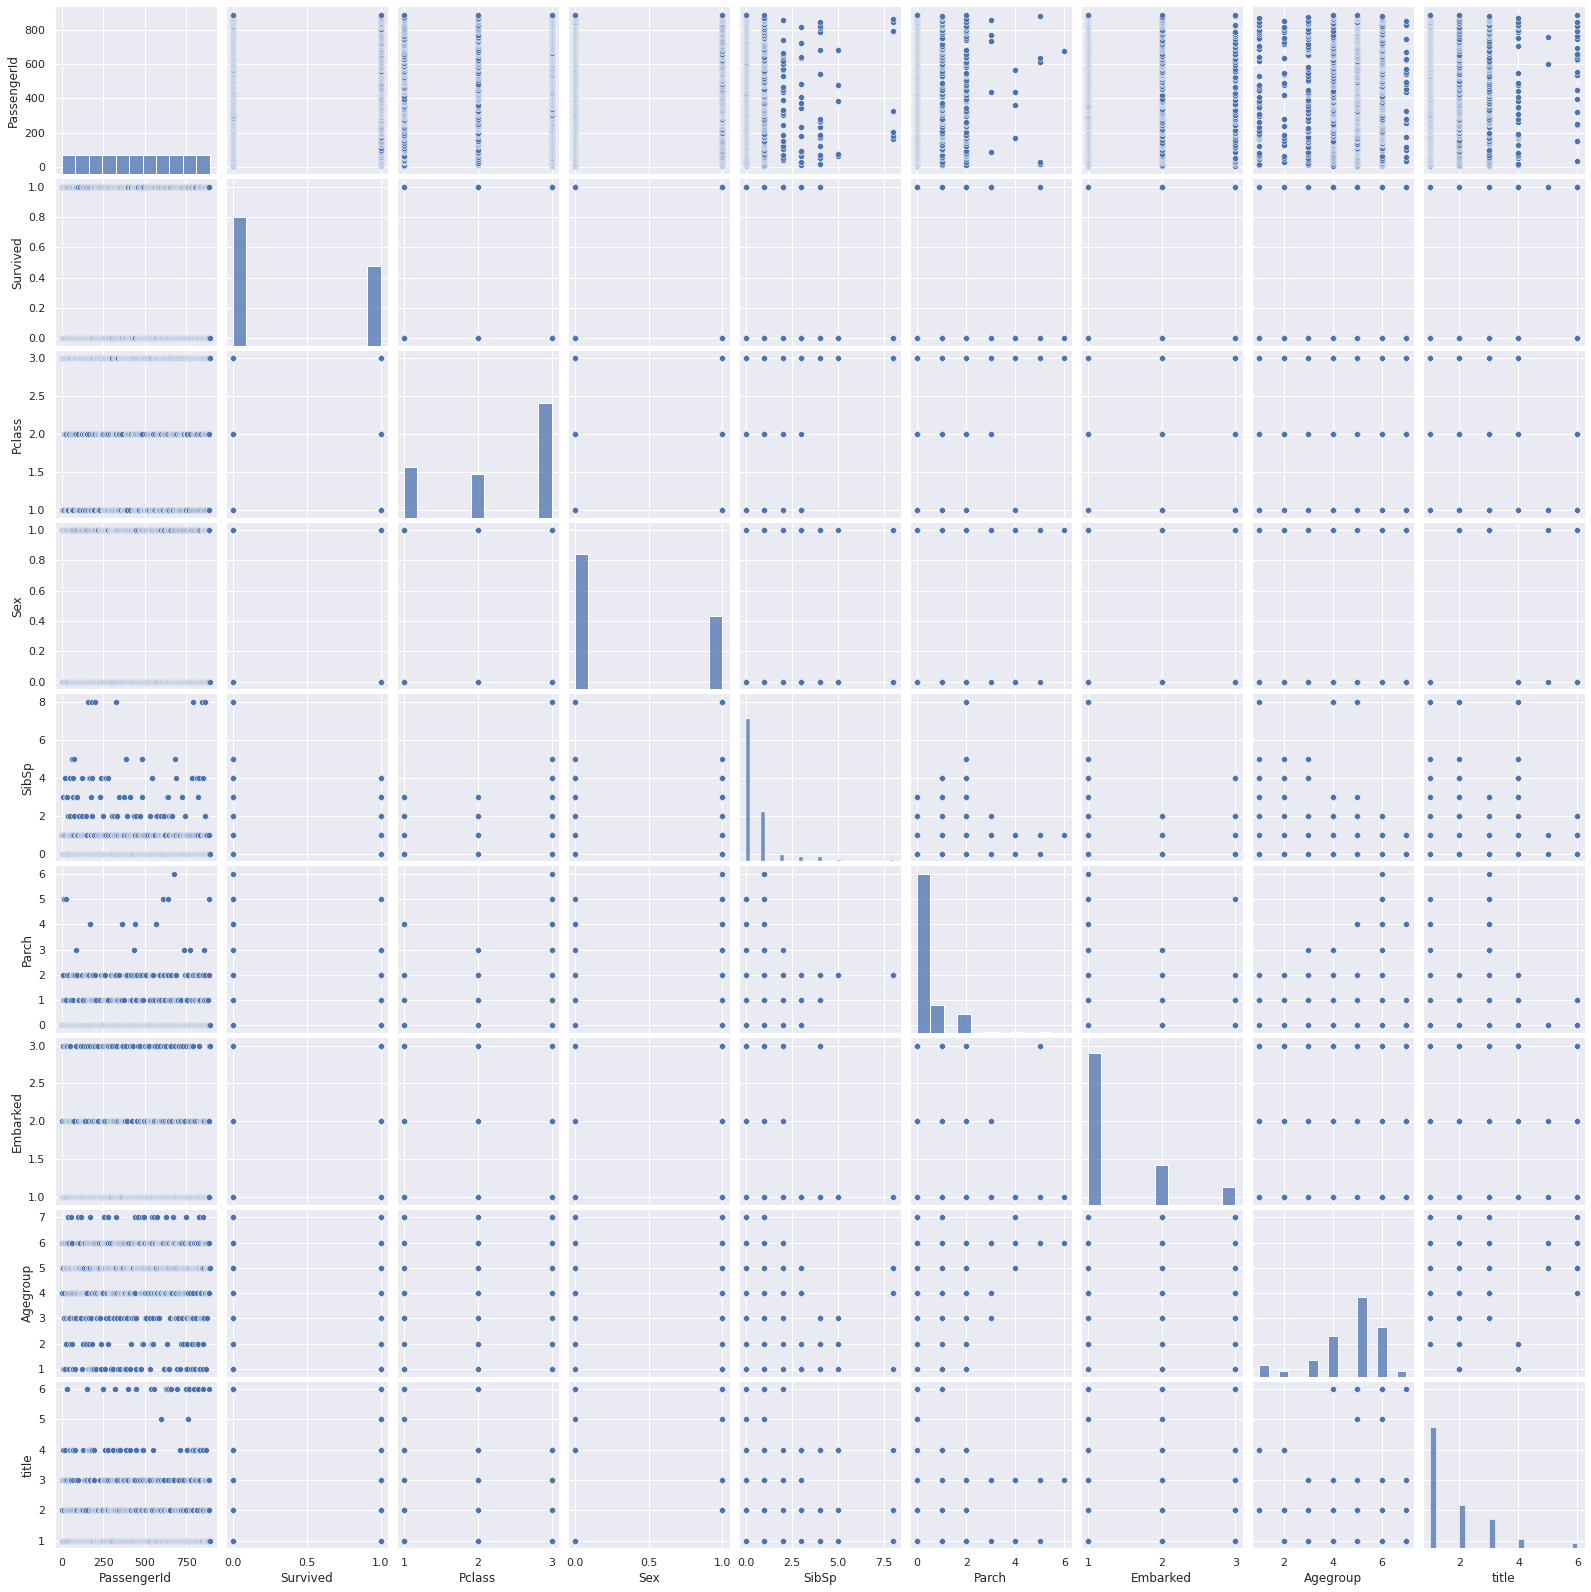

In [ ]:
sns.pairplot(train)

In [ ]:
#data manuplation
train=train.fillna({'Embarked':'S'})
test=test.fillna({'Embarked':'S'})


In [ ]:
train.head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Agegroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,yadult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,yadult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,yadult
5,6,0,3,"Moran, Mr. James",male,-0.5,0,0,8.4583,Q,unknown
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S,adult
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,S,baby
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,S,yadult
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,C,teanager


In [ ]:
#regular expression:
combine=[train,test]
#extract the title from name in training the  test dataset
for i in combine:
    i['title']=i.Name.str.extract('([A-Za-z]+)\.',expand=False)
pd.crosstab(train['title'],train['Sex'])    

Sex,female,male
title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [ ]:
for i in combine:
  i['title']=i['title'].replace(['Lady','Capt','Col','Don','Dr','Major','Rev','Jonkheer'],'Rare')
  i['title']=i['title'].replace(['Countess','Lady','Sir'],'Royal')
  i['title']=i['title'].replace('Mlle','Miss')
  i['title']=i['title'].replace('Ms','Miss')
  i['title']=i['title'].replace('Mme','Mrs')
train[['title','Survived']].groupby(['title'],as_index=False).mean()

,title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.285714
5,Royal,1.000000


In [ ]:
title_mapping={'Mr':1,'Miss':2,'Mrs':3,'Master':4,'Royal':5,'Rare':6}
for i in combine:
  i['title']=i['title'].map(title_mapping)
  i['title']=i['title'].fillna(0)
train.head(25)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Agegroup,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,student,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,adult,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,yadult,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,yadult,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,yadult,1
5,6,0,3,"Moran, Mr. James",male,-0.5,0,0,8.4583,Q,unknown,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S,adult,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,S,baby,4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,S,yadult,3
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,C,teanager,3


In [ ]:
#final_age.mapping 
mr_age=train[train['title']==1]['Agegroup'].mode()  #yadult
miss_age=train[train['title']==2]['Agegroup'].mode()  #student
mrs_age=train[train['title']==3]['Agegroup'].mode()  #adult
master_age=train[train['title']==4]['Agegroup'].mode() #baby
royal_age=train[train['title']==5]['Agegroup'].mode()  #adult
rare_age=train[train['title']==6]['Agegroup'].mode()   #adult


age_title_mapping={1:'yadult',2:'student',3:'adult',4:'baby',5:'adult',6:'adult'}

for i in range(len(train['Agegroup'])):
    if train['Agegroup'][i]=='unknown':
        train['Agegroup'][i]=age_title_mapping[train['title'][i]]
for i in range(len(test['Agegroup'])):
    if test['Agegroup'][i]=='unknown':
        test['Agegroup'][i]=age_title_mapping[test['title'][i]]


age_mapping={'baby': 1, 'child': 2, 'teanager': 3, 'student': 4, 'yadult': 5, 'adult': 6, 'senior': 7}
train['Agegroup'] = train['Agegroup'].map(age_mapping)
test['Agegroup'] = test['Agegroup'].map(age_mapping)

In [ ]:
mr_age

0    yadult
Name: Agegroup, dtype: category
Categories (8, object): ['unknown' < 'baby' < 'child' < 'teanager' < 'student' < 'yadult' < 'adult' <
                         'senior']

In [ ]:
miss_age

0    unknown
Name: Agegroup, dtype: category
Categories (8, object): ['unknown' < 'baby' < 'child' < 'teanager' < 'student' < 'yadult' < 'adult' <
                         'senior']

In [ ]:
master_age

0    baby
Name: Agegroup, dtype: category
Categories (8, object): ['unknown' < 'baby' < 'child' < 'teanager' < 'student' < 'yadult' < 'adult' <
                         'senior']

In [ ]:
royal_age

0    yadult
1     adult
Name: Agegroup, dtype: category
Categories (8, object): ['unknown' < 'baby' < 'child' < 'teanager' < 'student' < 'yadult' < 'adult' <
                         'senior']

In [ ]:
rare_age

0    adult
Name: Agegroup, dtype: category
Categories (8, object): ['unknown' < 'baby' < 'child' < 'teanager' < 'student' < 'yadult' < 'adult' <
                         'senior']

In [ ]:
train=train.drop(['Age'],axis=1)
test=test.drop(['Age'],axis=1)

In [ ]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Fare,Embarked,Agegroup,title
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,7.2500,S,4.0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,71.2833,C,6.0,3
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,7.9250,S,5.0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,53.1000,S,5.0,3
4,5,0,3,"Allen, Mr. William Henry",male,0,0,8.0500,S,5.0,1
5,6,0,3,"Moran, Mr. James",male,0,0,8.4583,Q,5.0,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,0,0,51.8625,S,6.0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,3,1,21.0750,S,1.0,4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,0,2,11.1333,S,5.0,3
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,1,0,30.0708,C,3.0,3


In [ ]:
test.head(10)

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Fare,Embarked,Agegroup,title
0,892,3,"Kelly, Mr. James",male,0,0,7.8292,Q,5.0,1.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,1,0,7.0000,S,6.0,3.0
2,894,2,"Myles, Mr. Thomas Francis",male,0,0,9.6875,Q,7.0,1.0
3,895,3,"Wirz, Mr. Albert",male,0,0,8.6625,S,5.0,1.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1,1,12.2875,S,4.0,3.0
5,897,3,"Svensson, Mr. Johan Cervin",male,0,0,9.2250,S,3.0,1.0
6,898,3,"Connolly, Miss. Kate",female,0,0,7.6292,Q,5.0,2.0
7,899,2,"Caldwell, Mr. Albert Francis",male,1,1,29.0000,S,5.0,1.0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,0,0,7.2292,C,3.0,3.0
9,901,3,"Davies, Mr. John Samuel",male,2,0,24.1500,S,4.0,1.0


In [ ]:
pd.isnull(train).sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Agegroup       0
title          0
dtype: int64

In [ ]:
pd.isnull(test).sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Fare           1
Embarked       0
Agegroup       0
title          0
dtype: int64

In [ ]:
train=train.drop(['Name'],axis=1)
test=test.drop(['Name'],axis=1)

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Agegroup,title
0,1,0,3,male,1,0,7.2500,S,4.0,1
1,2,1,1,female,1,0,71.2833,C,6.0,3
2,3,1,3,female,0,0,7.9250,S,5.0,2
3,4,1,1,female,1,0,53.1000,S,5.0,3
4,5,0,3,male,0,0,8.0500,S,5.0,1


In [ ]:
sex_mapping={"male":0,"female":1}
train['Sex']=train['Sex'].map(sex_mapping)
test['Sex']=test['Sex'].map(sex_mapping)

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Agegroup,title
0,1,0,3,0,1,0,7.2500,S,4.0,1
1,2,1,1,1,1,0,71.2833,C,6.0,3
2,3,1,3,1,0,0,7.9250,S,5.0,2
3,4,1,1,1,1,0,53.1000,S,5.0,3
4,5,0,3,0,0,0,8.0500,S,5.0,1


In [ ]:
Embarked_mapping={'S':1,'C':2,'Q':3}
train['Embarked']=train['Embarked'].map(Embarked_mapping)
test['Embarked']=test['Embarked'].map(Embarked_mapping)

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Agegroup,title
0,1,0,3,0,1,0,7.2500,1,4.0,1
1,2,1,1,1,1,0,71.2833,2,6.0,3
2,3,1,3,1,0,0,7.9250,1,5.0,2
3,4,1,1,1,1,0,53.1000,1,5.0,3
4,5,0,3,0,0,0,8.0500,1,5.0,1


In [ ]:
train['FareBand']=pd.qcut(train['Fare'],4,labels=[1,2,3,4])
test['FareBand']=pd.qcut(test['Fare'],4,labels=[1,2,3,4])

In [ ]:
test.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Fare,Embarked,Agegroup,title,FareBand
0,892,3,0,0,0,7.8292,3,5.0,1.0,1
1,893,3,1,1,0,7.0000,1,6.0,3.0,1
2,894,2,0,0,0,9.6875,3,7.0,1.0,2
3,895,3,0,0,0,8.6625,1,5.0,1.0,2
4,896,3,1,1,1,12.2875,1,4.0,3.0,2


In [ ]:
train=train.drop(['Fare'],axis=1)
test=test.drop(['Fare'],axis=1)

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,Agegroup,title,FareBand
0,1,0,3,0,1,0,1,4.0,1,1
1,2,1,1,1,1,0,2,6.0,3,4
2,3,1,3,1,0,0,1,5.0,2,2
3,4,1,1,1,1,0,1,5.0,3,4
4,5,0,3,0,0,0,1,5.0,1,2


In [ ]:
test.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,Agegroup,title,FareBand
0,892,3,0,0,0,3,5.0,1.0,1
1,893,3,1,1,0,1,6.0,3.0,1
2,894,2,0,0,0,3,7.0,1.0,2
3,895,3,0,0,0,1,5.0,1.0,2
4,896,3,1,1,1,1,4.0,3.0,2


In [ ]:

#logistics regress
from sklearn.model_selection import train_test_split
predictor=train.drop(['Survived','PassengerId'],axis=1)
target=train['Survived']
x_train,x_test,y_train,y_test=train_test_split(predictor, target, test_size = 0.25, random_state = 0)

In [ ]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred=LR.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
a_s=accuracy_score(y_test,y_pred)
cm

array([[112,  27],
       [ 21,  63]])

In [ ]:
a_s

0.7847533632286996

In [ ]:
#knn
#svm
#   from sklearn.svm import svc

In [ ]:
#knn

from sklearn.neighbors import KNeighborsClassifier
classifier= KNeighborsClassifier(n_neighbors=5,metric = 'minkowski',p=2)
classifier.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_pred=classifier.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
ce=confusion_matrix(y_test,y_pred)
print(ce)
asc=round(accuracy_score(y_test,y_pred)*100,2)

[[119  20]
 [ 21  63]]


In [ ]:
asc

81.61

In [ ]:
#SVM

from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
acc_svc = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_svc)

from sklearn.metrics import confusion_matrix
co=confusion_matrix(y_test,y_pred)
print(co)


82.06
[[121  18]
 [ 22  62]]


In [ ]:
# nayes bayes algo 
from sklearn.naive_bayes import GaussianNB
nay=GaussianNB()
nay.fit(x_train,y_train)



ct=confusion_matrix(y_test,y_pred)
print(ct)
ac_nay=round(accuracy_score(y_test,y_pred)*100,2)
print(ac_nay)

[[121  18]
 [ 22  62]]
82.06


In [ ]:
y_pred=nay.predict(x_test)

In [ ]:
#descision tree clasifier

from sklearn.tree import DecisionTreeClassifier
de=DecisionTreeClassifier()
de.fit(x_train,y_train)
y_pred=de.predict(x_test)


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cf=confusion_matrix(y_test,y_pred)
print(cf)
ac_de=round(accuracy_score(y_test,y_pred)*100,2)
print(ac_de)

[[122  17]
 [ 28  56]]
79.82


In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier= RandomForestClassifier(n_estimators=100, criterion="entropy", random_state=0)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cs=confusion_matrix(y_test,y_pred)
print(cs)
ac_ra=round(accuracy_score(y_test,y_pred)*100,2)
print(ac_ra)

[[121  18]
 [ 19  65]]
83.41
